# 11과 이변량_숫자 vs 범주

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 직원 이직 분석


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://bit.ly/3HaMAtZ')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Family,Age_scale1
0,0,3,male,22.0,1,0,7.2500,S,Age21_30,2,0.271174
1,1,1,female,38.0,1,0,71.2833,C,Age31_40,2,0.472229
2,1,3,female,26.0,0,0,7.9250,S,Age21_30,1,0.321438
3,1,1,female,35.0,1,0,53.1000,S,Age31_40,2,0.434531
4,0,3,male,35.0,0,0,8.0500,S,Age31_40,1,0.434531


## 2.시각화

* 히스토그램을 Survived로 나눠서 그려봅시다.

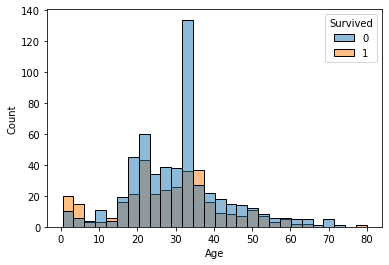

In [3]:
sns.histplot(x='Age', data = titanic, hue = 'Survived')
plt.show()

* kdeplot을 그려봅시다.  
* 두가지 방법이 있습니다.
    * ① kdeplot(   , hue = 'Survived) 
        * 생존여부의 비율이 유지된 채로 그려짐
        * 두 그래프의 아래 면적의 합이 1
    * ② kdeplot(   , hue = 'Survived, common_norm = False)
        * 생존여부 각각 아래 면적의 합이 1인 그래프
    * ③ kdeplot(   , hue = 'Survived, multiple = 'fill')
        * 나이에 따라 생존여부 **비율**을 비교해볼 수 있음. (양의 비교가 아닌 비율!)


① kdeplot( , hue = 'Survived)

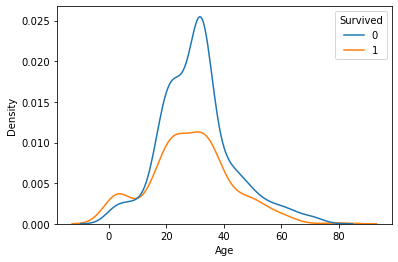

In [4]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived')
plt.show()

② kdeplot( , hue = 'Survived, common_norm = False)

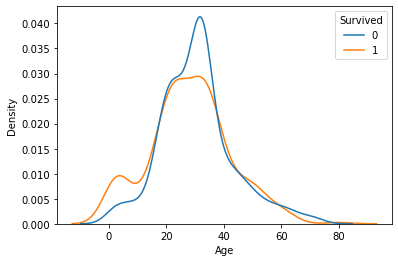

In [5]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived', common_norm = False)
plt.show()

③ multiple = 'fill' 옵션

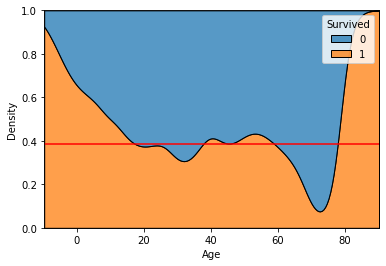

In [6]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived'
            , multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

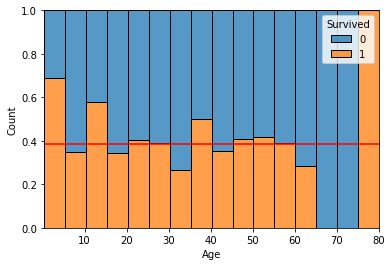

In [7]:
sns.histplot(x='Age', data = titanic, bins = 16
             , hue ='Survived', multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

### 연습

* Fare --> Survived : 히스토그램과 밀도함수 그래프로 시각화 해 봅시다.

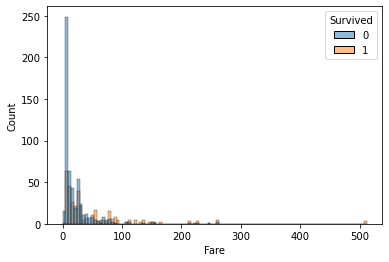

In [8]:
sns.histplot(x='Fare', data = titanic, hue = 'Survived')
plt.show()


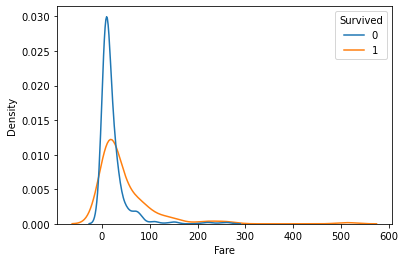

In [10]:
sns.kdeplot(x='Fare', data = titanic, hue ='Survived', common_norm = False)
plt.show()

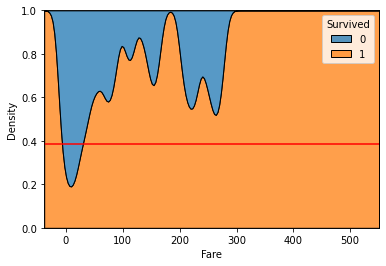

In [12]:
sns.kdeplot(x='Fare', data = titanic, hue ='Survived'
            , multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

## 3.수치화 : 로지스틱 회귀 모델로 부터 p value 구하기

숫자 --> 범주에 대해 딱 맞는 가설검정 도구가 없으므로, 로지스틱 회귀 모델로 부터 p-value를 구해봅시다.

In [13]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(titanic['Survived'], titanic['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.661967
         Iterations 4
Age    3.932980e-13
dtype: float64


### 연습

* Fare --> Survived : 로지스틱회귀로 부터 p-value를 구해 봅시다.

In [14]:
model = sm.Logit(titanic['Survived'], titanic['Fare'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4
Fare    0.014925
dtype: float64


# 종합실습

## 1.환경준비

* 라이브러리 불러오기

In [15]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 직원 이직 분석

① 타이타닉 생존자

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [16]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


② 직원 이직 분석


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	EmployNumber	|	사번	|	숫자	| 	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|

In [17]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV'
attrition = pd.read_csv(path)  
attrition.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


## 2.시각화

① titanic : Age -- > Survived

* 히스토그램으로 관계를 살펴 봅시다.

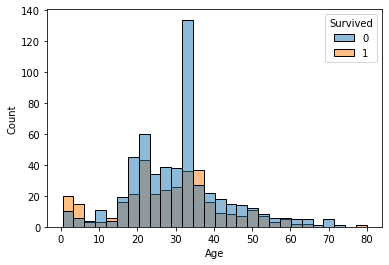

In [18]:
sns.histplot(x='Age', data = titanic, hue = 'Survived')
plt.show()

* density plot으로 비교해봅시다. (common_norm = False)

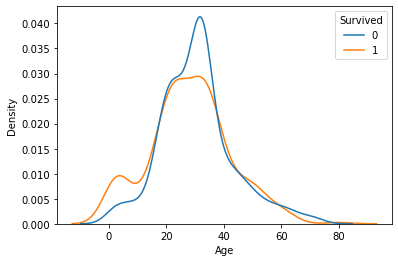

In [19]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived',common_norm = False)
plt.show()

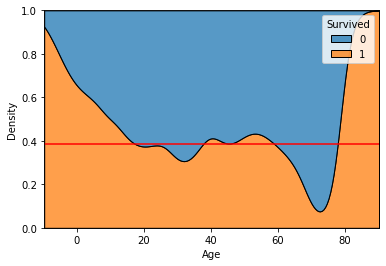

In [20]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived'
            , multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

In [ ]:
#나이 많은 사람과 어린이가 생존율 높음

* 차트를 해석해 봅시다.

② attrition : Age -- > Attrition

* 히스토그램으로 관계를 살펴 봅시다.

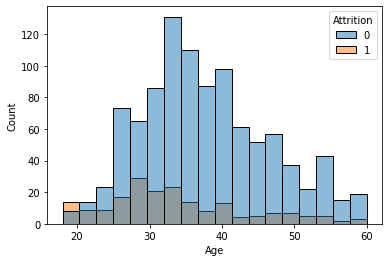

In [24]:
sns.histplot(x='Age', data = attrition, hue = 'Attrition')
plt.show()

* density plot으로 비교해봅시다.

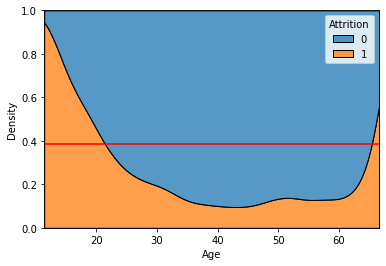

In [25]:
sns.kdeplot(x='Age', data = attrition, hue ='Attrition'
            , multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

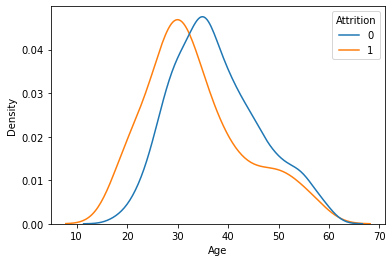

In [26]:
sns.kdeplot(x='Age', data = attrition, hue ='Attrition',common_norm = False)
plt.show()

* 차트를 해석해 봅시다.

In [ ]:
#젊은 연령층 이직률 높다

③ attrition : MonthlyIncome -- > Attrition

* 히스토그램으로 관계를 살펴 봅시다.

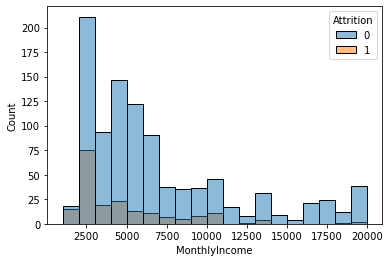

In [28]:
sns.histplot(x='MonthlyIncome', data = attrition, hue = 'Attrition')
plt.show()

* density plot으로 비교해봅시다.

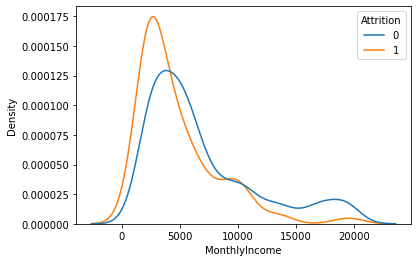

In [29]:
sns.kdeplot(x='MonthlyIncome', data = attrition, hue ='Attrition',common_norm = False)
plt.show()

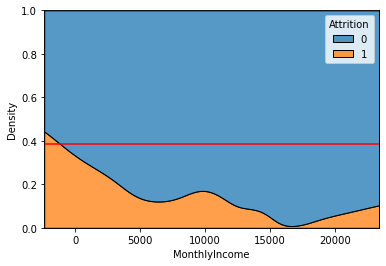

In [30]:
sns.kdeplot(x='MonthlyIncome', data = attrition, hue ='Attrition'
            , multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

* 차트를 해석해 봅시다.

In [ ]:
#수입이 낮을수록 이직 만ㄹ이 함

## 3.수치화 : 로지스틱 회귀 모델로 부터 p value 구하기

숫자 --> 범주에 대해 딱 맞는 가설검정 도구가 없으므로, 로지스틱 회귀 모델로 부터 p-value를 구해봅시다.

① titanic : Age -- > Survived

* 로지스틱 회귀 모형으로 부터 pvalue를 구해 봅시다.

In [31]:
model = sm.Logit(titanic['Survived'], titanic['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.661967
         Iterations 4
Age    3.932980e-13
dtype: float64


* 결과를 해석해 봅시다.

② attrition : Age -- > Attrition

* 로지스틱 회귀 모형으로 부터 pvalue를 구해 봅시다.

In [32]:
model = sm.Logit(attrition['Attrition'], attrition['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.430080
         Iterations 5
Age    7.135567e-95
dtype: float64


* 결과를 해석해 봅시다.

③ attrition : MonthlyIncome -- > Attrition

* 로지스틱 회귀 모형으로 부터 pvalue를 구해 봅시다.

In [33]:
model = sm.Logit(attrition['Attrition'], attrition['MonthlyIncome'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.443778
         Iterations 6
MonthlyIncome    7.889510e-68
dtype: float64


* 결과를 해석해 봅시다.